In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [58]:
iris = datasets.load_iris()
X_train,X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.5)


In [59]:
def kNN(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        dist = []
        for x_train in X_train:
            dist.append(distance.euclidean(x, x_train))
        
        k_sorted = np.argsort(dist)[:k]
        k_labels_near = []
        for i in k_sorted:
            k_labels_near.append(y_train[i])
        
        dominant =  max(set(k_labels_near), key = k_labels_near.count)
        y_pred.append(dominant)
    return y_pred

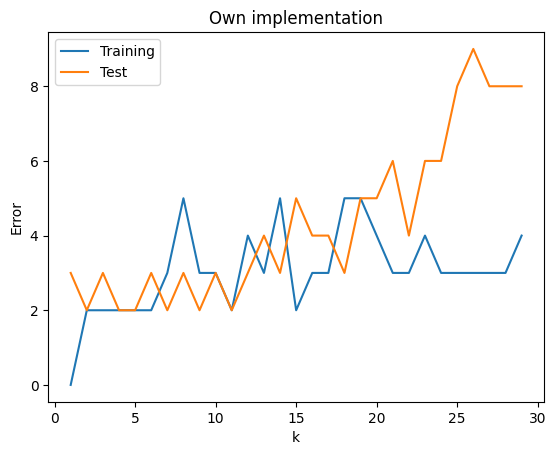

In [60]:
N = 30

train_err = []
test_err = []
for k in range(1,N):
    y_train_pred = kNN(X_train, y_train, X_train, k)
    train_err.append(np.sum(y_train_pred != y_train))
    y_test_pred = kNN(X_train, y_train, X_test, k)
    test_err.append(np.sum(y_test_pred != y_test))

plt.plot(range(1,N), train_err, label='Training')
plt.plot(range(1,N), test_err, label='Test')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Own implementation')
plt.legend()
plt.show()

In [61]:
print("Najlepsza wartość k: ",np.argmin(test_err) + 1)

Najlepsza wartość k:  2


Ex. 2

In [62]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [63]:
iris = datasets.load_iris()
X_train,X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.6)

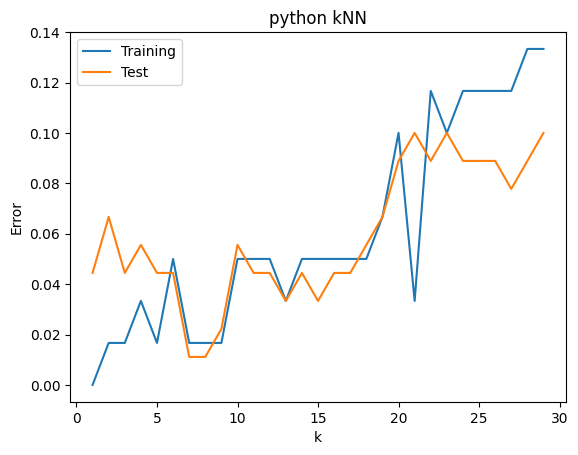

In [64]:
N = 30

train_err = []
test_err = []
for k in range(1,N):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_train_pred = kNN.predict(X_train)
    train_err.append(1-accuracy_score(y_train, y_train_pred))
    y_test_pred = kNN.predict(X_test)
    test_err.append(1-accuracy_score(y_test, y_test_pred))

plt.plot(range(1,N), train_err, label='Training')
plt.plot(range(1,N), test_err, label='Test')
plt.xlabel('k')
plt.ylabel('Error')
plt.title("python kNN")
plt.legend()
plt.show()

In [65]:
print("Najlepsza wartość k: ",np.argmin(test_err) + 1)

Najlepsza wartość k:  7


Ex. 3

In [66]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [67]:
clf.predict(iris.data[:1, :])

array([0])

In [68]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [73]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.png")

True